In [1]:
#Import Packages
import numpy as np
import os
import pickle
from multicontact_learning_local_objectives.python.machine_learning.ml_utils import *
import matplotlib.pyplot as plt #Matplotlib
import shutil

print("Double check the Path for storing trajectories is correct")

Double check the Path for storing trajectories is correct


In [2]:
#Define Path for Storing Trajectories
#Collect Data Points Path
#workingDirectory = "/home/jiayu/Desktop/multicontact_learning_local_objectives/data/large_slope_flat_patches/"
workingDirectory = "/media/jiayu/Seagate/Rubbles_Noise_Add2Steps_1StepbeforeFail_RemovebyClip"
# workingDirectory = "/home/jiayu/Desktop/MLP_DataSet/Rubbles_RegretOneStep"
#NOTE: need to have "/" at the end
print("Double Check we provide the Correct Traj Path: \n", workingDirectory)

#Define dataset folder
TrainingSetPath = [workingDirectory + "/DataSet/"+"TrainingSet_Initial"]

# TrainingSetPath = [workingDirectory + "/DataSet/"+"TrainingSet",
#                    workingDirectory + "/DataSet/"+"Training_Aug_1StepBeforeFail_1Time",
#                    workingDirectory + "/DataSet/"+"Training_Aug_1StepBeforeFail_2Time",
#                    workingDirectory + "/DataSet/"+"Training_Aug_1StepBeforeFail_3Time"]

ValidationSetPath = workingDirectory + "/DataSet/"+"ValidationSet"
TestSetPath = workingDirectory + "/DataSet/"+"TestSet"

#Path to store ML Model, create one if we dont have
ML_Model_Path = workingDirectory + "/ML_Models/"
if not (os.path.isdir(ML_Model_Path)):
    os.mkdir(ML_Model_Path)


Double Check we provide the Correct Traj Path: 
 /media/jiayu/Seagate/Rubbles_Noise_Add2Steps_1StepbeforeFail_RemovebyClip


In [3]:
#Learning Code
from sklearn.model_selection import train_test_split
import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense
from tensorflow.keras.layers import GaussianNoise
from tensorflow.keras.layers import Dropout

In [4]:
#Load DataSet File

#For training set
for trainingset_idx in range(len(TrainingSetPath)):
    trainingset_file = TrainingSetPath[trainingset_idx] + "/data"+'.p'
    trainingset = pickle.load(open(trainingset_file,"rb"))
    
    print("For dataset: ", trainingset_idx)
    print("DataSet Sizes: ")
    
    if trainingset_idx == 0:
        x_train = trainingset["input"]
        y_train = trainingset["output"]
    else:
        x_train = np.concatenate((x_train,trainingset["input"]),axis=0)
        y_train = np.concatenate((y_train,trainingset["output"]),axis=0)
    
    print(x_train.shape)
    print(y_train.shape)

    print("World Frame Shift: ", trainingset["Shift_World_Frame_Type"])
    print("Contact Location Representation Type: ",trainingset["Contact_Representation_Type"])
    print("Scaling Factor of Variables: ",trainingset["VectorScaleFactor"])
    print("Number of Preview Steps: ", trainingset["NumPreviewSteps"])
    print("Pre Process Mode: ",trainingset["PreProcessMode"])
    print(" ")

print("Final Data Set Size")
print(x_train.shape)
print(y_train.shape)
print(" ")

#For validation and Test

#Load Validation Set and Test Set
validationset_file = ValidationSetPath + "/data"+'.p'
validationset = pickle.load(open(validationset_file,"rb"))

testset_file = TestSetPath + "/data"+'.p'
testset = pickle.load(open(testset_file,"rb"))

x_valid = validationset["input"]
y_valid = validationset["output"]

x_test = testset["input"]
y_test = testset["output"]

print("Set Up for Validation Set")
print("World Frame Shift: ", validationset["Shift_World_Frame_Type"])
print("Contact Location Representation Type: ",validationset["Contact_Representation_Type"])
print("Scaling Factor of Variables: ",validationset["VectorScaleFactor"])
print("Number of Preview Steps: ", validationset["NumPreviewSteps"])
print("Pre Process Mode: ",validationset["PreProcessMode"])
print("Validation Set Size")
print(x_valid.shape)
print(y_valid.shape)
print(" ")

print(" ")

print("Set Up for Test Set")
print("World Frame Shift: ", testset["Shift_World_Frame_Type"])
print("Contact Location Representation Type: ",testset["Contact_Representation_Type"])
print("Scaling Factor of Variables: ",testset["VectorScaleFactor"])
print("Number of Preview Steps: ", testset["NumPreviewSteps"])
print("Pre Process Mode: ",testset["PreProcessMode"])
print("Test Set Size")
print(x_test.shape)
print(y_test.shape)
print(" ")

For dataset:  0
DataSet Sizes: 
(12000, 85)
(12000, 11)
World Frame Shift:  StanceFoot
Contact Location Representation Type:  FollowRectangelBorder
Scaling Factor of Variables:  1.0
Number of Preview Steps:  4
Pre Process Mode:  OriginalForm
 
Final Data Set Size
(12000, 85)
(12000, 11)
 
Set Up for Validation Set
World Frame Shift:  StanceFoot
Contact Location Representation Type:  FollowRectangelBorder
Scaling Factor of Variables:  1.0
Number of Preview Steps:  4
Pre Process Mode:  OriginalForm
Validation Set Size
(23250, 85)
(23250, 11)
 
 
Set Up for Test Set
World Frame Shift:  StanceFoot
Contact Location Representation Type:  FollowRectangelBorder
Scaling Factor of Variables:  1.0
Number of Preview Steps:  4
Pre Process Mode:  OriginalForm
Test Set Size
(23250, 85)
(23250, 11)
 


In [5]:
#Decide input and outpu dimensionality
d_in = x_train[0].shape[0]
print("input dim: ", d_in)
d_out = y_train[0].shape[0]
print("output dim:", d_out)
print(" ")

# #Double check with mean and std
# print("Inputs: ")
# print("Input Mean: ", x_train.mean(axis=0))
# print("Input Std: ", x_train.std(axis=0))
# print("Input Max: ", x_train.max(axis=0))
# print("Input Min: ", x_train.min(axis=0))
# print(" ")


# print("Output Mean: ", y_train.mean(axis=0))
# print("Output Std: ", y_train.std(axis=0))
# print("Output Max: ", y_train.max(axis=0))
# print("Output Min: ", y_train.min(axis=0))

# print("Final Data Set Size")
# print(x_train.shape)
# print(y_train.shape)

input dim:  85
output dim: 11
 


In [6]:
#Define learning model
# model = Sequential([
#     Dense(256, activation='relu', input_shape=(d_in,)),
#     Dense(256, activation='relu'),
#     Dense(256, activation='relu'),
#     Dense(256, activation='relu'),
#     Dense(d_out)
# ])
# loss: 4.6886e-04 - val_loss: 5.4786e-04

# #True code
# model = Sequential([
#     Dense(256, activation='relu', input_shape=(d_in,)), #tanh
#     Dense(256, activation='relu'),
#     Dense(256, activation='relu'),
#     Dense(256, activation='relu'),
#     Dense(d_out, activation='linear')
# ])

# #True code
# model = Sequential([
#     Dense(256, activation='relu', input_shape=(d_in,), kernel_regularizer='l1'), #tanh
#     Dense(256, activation='relu', kernel_regularizer='l1'),
#     Dense(256, activation='relu', kernel_regularizer='l1'),
#     Dense(256, activation='relu', kernel_regularizer='l1'),
#     Dense(d_out, activation='linear')
# ])

#True code
model = Sequential([
    GaussianNoise([0.003]*12+[0.0]*73),
    Dense(256, activation='relu', input_shape=(d_in,), ), #tanh
    Dense(256, activation='relu', ),
    Dense(256, activation='relu', ),
    Dense(256, activation='relu', ),
    Dense(d_out, activation='linear')
])


In [7]:
#Train Learning Model
model.compile(optimizer=tf.keras.optimizers.Adam(lr=0.0001), loss='mse') #0.0001

#history = model.fit(x_train, y_train, epochs = 50000, validation_split=0.0, batch_size = x_train.shape[0])
#history = model.fit(x_train, y_train, epochs = 3000, validation_split=0.0, batch_size = 1280) #1280
history = model.fit(x = x_train, y = y_train, epochs = 2000, batch_size = 1280, validation_data = (x_valid, y_valid),shuffle=True) #1280, 1000 epoch

Epoch 1/2000
10/10 [==============================] - 0s 21ms/step - loss: 0.1197 - val_loss: 0.0691
Epoch 2/2000
10/10 [==============================] - 0s 12ms/step - loss: 0.0483 - val_loss: 0.0264
Epoch 3/2000
10/10 [==============================] - 0s 11ms/step - loss: 0.0172 - val_loss: 0.0086
Epoch 4/2000
10/10 [==============================] - 0s 10ms/step - loss: 0.0059 - val_loss: 0.0036
Epoch 5/2000
10/10 [==============================] - 0s 13ms/step - loss: 0.0026 - val_loss: 0.0019
Epoch 6/2000
10/10 [==============================] - 0s 10ms/step - loss: 0.0017 - val_loss: 0.0017
Epoch 7/2000
10/10 [==============================] - 0s 9ms/step - loss: 0.0015 - val_loss: 0.0014
Epoch 8/2000
10/10 [==============================] - 0s 9ms/step - loss: 0.0013 - val_loss: 0.0013
Epoch 9/2000
10/10 [==============================] - 0s 9ms/step - loss: 0.0012 - val_loss: 0.0012
Epoch 10/2000
10/10 [==============================] - 0s 10ms/step - loss: 0.0011 - val_loss:

10/10 [==============================] - 0s 9ms/step - loss: 4.8504e-04 - val_loss: 5.0096e-04
Epoch 78/2000
10/10 [==============================] - 0s 9ms/step - loss: 4.8268e-04 - val_loss: 4.9644e-04
Epoch 79/2000
10/10 [==============================] - 0s 9ms/step - loss: 4.8043e-04 - val_loss: 4.9380e-04
Epoch 80/2000
10/10 [==============================] - 0s 9ms/step - loss: 4.7763e-04 - val_loss: 4.9121e-04
Epoch 81/2000
10/10 [==============================] - 0s 9ms/step - loss: 4.7639e-04 - val_loss: 4.8942e-04
Epoch 82/2000
10/10 [==============================] - 0s 9ms/step - loss: 4.7307e-04 - val_loss: 4.9100e-04
Epoch 83/2000
10/10 [==============================] - 0s 8ms/step - loss: 4.7310e-04 - val_loss: 4.8625e-04
Epoch 84/2000
10/10 [==============================] - 0s 9ms/step - loss: 4.6926e-04 - val_loss: 4.8250e-04
Epoch 85/2000
10/10 [==============================] - 0s 8ms/step - loss: 4.6707e-04 - val_loss: 4.7874e-04
Epoch 86/2000
10/10 [============

Epoch 152/2000
10/10 [==============================] - 0s 8ms/step - loss: 3.4953e-04 - val_loss: 3.6201e-04
Epoch 153/2000
10/10 [==============================] - 0s 8ms/step - loss: 3.4842e-04 - val_loss: 3.6115e-04
Epoch 154/2000
10/10 [==============================] - 0s 8ms/step - loss: 3.4767e-04 - val_loss: 3.6031e-04
Epoch 155/2000
10/10 [==============================] - 0s 8ms/step - loss: 3.4519e-04 - val_loss: 3.5560e-04
Epoch 156/2000
10/10 [==============================] - 0s 9ms/step - loss: 3.4345e-04 - val_loss: 3.5383e-04
Epoch 157/2000
10/10 [==============================] - 0s 9ms/step - loss: 3.4190e-04 - val_loss: 3.5235e-04
Epoch 158/2000
10/10 [==============================] - 0s 8ms/step - loss: 3.4083e-04 - val_loss: 3.5150e-04
Epoch 159/2000
10/10 [==============================] - 0s 8ms/step - loss: 3.3940e-04 - val_loss: 3.5220e-04
Epoch 160/2000
10/10 [==============================] - 0s 8ms/step - loss: 3.3949e-04 - val_loss: 3.5488e-04
Epoch 161/

10/10 [==============================] - 0s 8ms/step - loss: 2.8198e-04 - val_loss: 2.9455e-04
Epoch 227/2000
10/10 [==============================] - 0s 8ms/step - loss: 2.8127e-04 - val_loss: 2.9581e-04
Epoch 228/2000
10/10 [==============================] - 0s 8ms/step - loss: 2.8081e-04 - val_loss: 2.9312e-04
Epoch 229/2000
10/10 [==============================] - 0s 8ms/step - loss: 2.8088e-04 - val_loss: 2.9291e-04
Epoch 230/2000
10/10 [==============================] - 0s 8ms/step - loss: 2.7991e-04 - val_loss: 2.9281e-04
Epoch 231/2000
10/10 [==============================] - 0s 9ms/step - loss: 2.7849e-04 - val_loss: 2.8908e-04
Epoch 232/2000
10/10 [==============================] - 0s 8ms/step - loss: 2.7707e-04 - val_loss: 2.8973e-04
Epoch 233/2000
10/10 [==============================] - 0s 8ms/step - loss: 2.7796e-04 - val_loss: 2.8850e-04
Epoch 234/2000
10/10 [==============================] - 0s 9ms/step - loss: 2.7743e-04 - val_loss: 2.8868e-04
Epoch 235/2000
10/10 [===

10/10 [==============================] - 0s 8ms/step - loss: 2.4783e-04 - val_loss: 2.6120e-04
Epoch 301/2000
10/10 [==============================] - 0s 9ms/step - loss: 2.4769e-04 - val_loss: 2.6408e-04
Epoch 302/2000
10/10 [==============================] - 0s 8ms/step - loss: 2.4973e-04 - val_loss: 2.6157e-04
Epoch 303/2000
10/10 [==============================] - 0s 9ms/step - loss: 2.4781e-04 - val_loss: 2.6158e-04
Epoch 304/2000
10/10 [==============================] - 0s 8ms/step - loss: 2.4787e-04 - val_loss: 2.6365e-04
Epoch 305/2000
10/10 [==============================] - 0s 8ms/step - loss: 2.4816e-04 - val_loss: 2.6485e-04
Epoch 306/2000
10/10 [==============================] - 0s 9ms/step - loss: 2.4808e-04 - val_loss: 2.6344e-04
Epoch 307/2000
10/10 [==============================] - 0s 9ms/step - loss: 2.4681e-04 - val_loss: 2.6066e-04
Epoch 308/2000
10/10 [==============================] - 0s 8ms/step - loss: 2.4686e-04 - val_loss: 2.5976e-04
Epoch 309/2000
10/10 [===

10/10 [==============================] - 0s 9ms/step - loss: 2.3331e-04 - val_loss: 2.4779e-04
Epoch 375/2000
10/10 [==============================] - 0s 10ms/step - loss: 2.3224e-04 - val_loss: 2.4791e-04
Epoch 376/2000
10/10 [==============================] - 0s 10ms/step - loss: 2.3236e-04 - val_loss: 2.5124e-04
Epoch 377/2000
10/10 [==============================] - 0s 9ms/step - loss: 2.3521e-04 - val_loss: 2.5112e-04
Epoch 378/2000
10/10 [==============================] - 0s 9ms/step - loss: 2.3302e-04 - val_loss: 2.5025e-04
Epoch 379/2000
10/10 [==============================] - 0s 9ms/step - loss: 2.3354e-04 - val_loss: 2.4733e-04
Epoch 380/2000
10/10 [==============================] - 0s 10ms/step - loss: 2.3205e-04 - val_loss: 2.4921e-04
Epoch 381/2000
10/10 [==============================] - 0s 10ms/step - loss: 2.3199e-04 - val_loss: 2.4698e-04
Epoch 382/2000
10/10 [==============================] - 0s 9ms/step - loss: 2.3148e-04 - val_loss: 2.4669e-04
Epoch 383/2000
10/10 

10/10 [==============================] - 0s 10ms/step - loss: 2.2085e-04 - val_loss: 2.3809e-04
Epoch 449/2000
10/10 [==============================] - 0s 9ms/step - loss: 2.2126e-04 - val_loss: 2.4141e-04
Epoch 450/2000
10/10 [==============================] - 0s 8ms/step - loss: 2.2335e-04 - val_loss: 2.4405e-04
Epoch 451/2000
10/10 [==============================] - 0s 9ms/step - loss: 2.2313e-04 - val_loss: 2.3806e-04
Epoch 452/2000
10/10 [==============================] - 0s 10ms/step - loss: 2.2015e-04 - val_loss: 2.3694e-04
Epoch 453/2000
10/10 [==============================] - 0s 9ms/step - loss: 2.1968e-04 - val_loss: 2.3673e-04
Epoch 454/2000
10/10 [==============================] - 0s 9ms/step - loss: 2.2008e-04 - val_loss: 2.3585e-04
Epoch 455/2000
10/10 [==============================] - 0s 9ms/step - loss: 2.1939e-04 - val_loss: 2.3553e-04
Epoch 456/2000
10/10 [==============================] - 0s 8ms/step - loss: 2.1897e-04 - val_loss: 2.3674e-04
Epoch 457/2000
10/10 [=

10/10 [==============================] - 0s 9ms/step - loss: 2.1088e-04 - val_loss: 2.3200e-04
Epoch 523/2000
10/10 [==============================] - 0s 8ms/step - loss: 2.1095e-04 - val_loss: 2.3297e-04
Epoch 524/2000
10/10 [==============================] - 0s 8ms/step - loss: 2.1191e-04 - val_loss: 2.3015e-04
Epoch 525/2000
10/10 [==============================] - 0s 9ms/step - loss: 2.1195e-04 - val_loss: 2.3380e-04
Epoch 526/2000
10/10 [==============================] - 0s 9ms/step - loss: 2.1252e-04 - val_loss: 2.2839e-04
Epoch 527/2000
10/10 [==============================] - 0s 9ms/step - loss: 2.1025e-04 - val_loss: 2.2862e-04
Epoch 528/2000
10/10 [==============================] - 0s 9ms/step - loss: 2.1158e-04 - val_loss: 2.3227e-04
Epoch 529/2000
10/10 [==============================] - 0s 8ms/step - loss: 2.1294e-04 - val_loss: 2.3029e-04
Epoch 530/2000
10/10 [==============================] - 0s 8ms/step - loss: 2.1100e-04 - val_loss: 2.3139e-04
Epoch 531/2000
10/10 [===

10/10 [==============================] - 0s 8ms/step - loss: 2.0461e-04 - val_loss: 2.2181e-04
Epoch 597/2000
10/10 [==============================] - 0s 8ms/step - loss: 2.0385e-04 - val_loss: 2.2967e-04
Epoch 598/2000
10/10 [==============================] - 0s 8ms/step - loss: 2.0719e-04 - val_loss: 2.2808e-04
Epoch 599/2000
10/10 [==============================] - 0s 8ms/step - loss: 2.0452e-04 - val_loss: 2.2307e-04
Epoch 600/2000
10/10 [==============================] - 0s 8ms/step - loss: 2.0199e-04 - val_loss: 2.2387e-04
Epoch 601/2000
10/10 [==============================] - 0s 8ms/step - loss: 2.0264e-04 - val_loss: 2.2803e-04
Epoch 602/2000
10/10 [==============================] - 0s 8ms/step - loss: 2.0545e-04 - val_loss: 2.2753e-04
Epoch 603/2000
10/10 [==============================] - 0s 9ms/step - loss: 2.0547e-04 - val_loss: 2.3002e-04
Epoch 604/2000
10/10 [==============================] - 0s 8ms/step - loss: 2.0518e-04 - val_loss: 2.2312e-04
Epoch 605/2000
10/10 [===

10/10 [==============================] - 0s 10ms/step - loss: 1.9684e-04 - val_loss: 2.1981e-04
Epoch 671/2000
10/10 [==============================] - 0s 9ms/step - loss: 1.9815e-04 - val_loss: 2.1728e-04
Epoch 672/2000
10/10 [==============================] - 0s 9ms/step - loss: 1.9663e-04 - val_loss: 2.1775e-04
Epoch 673/2000
10/10 [==============================] - 0s 9ms/step - loss: 1.9524e-04 - val_loss: 2.1715e-04
Epoch 674/2000
10/10 [==============================] - 0s 9ms/step - loss: 1.9541e-04 - val_loss: 2.1585e-04
Epoch 675/2000
10/10 [==============================] - 0s 11ms/step - loss: 1.9539e-04 - val_loss: 2.1584e-04
Epoch 676/2000
10/10 [==============================] - 0s 10ms/step - loss: 1.9760e-04 - val_loss: 2.1669e-04
Epoch 677/2000
10/10 [==============================] - 0s 8ms/step - loss: 1.9655e-04 - val_loss: 2.1767e-04
Epoch 678/2000
10/10 [==============================] - 0s 9ms/step - loss: 1.9475e-04 - val_loss: 2.1576e-04
Epoch 679/2000
10/10 [

10/10 [==============================] - 0s 8ms/step - loss: 1.9105e-04 - val_loss: 2.1603e-04
Epoch 745/2000
10/10 [==============================] - 0s 9ms/step - loss: 1.9093e-04 - val_loss: 2.1330e-04
Epoch 746/2000
10/10 [==============================] - 0s 8ms/step - loss: 1.9014e-04 - val_loss: 2.1208e-04
Epoch 747/2000
10/10 [==============================] - 0s 8ms/step - loss: 1.8864e-04 - val_loss: 2.1777e-04
Epoch 748/2000
10/10 [==============================] - 0s 9ms/step - loss: 1.8983e-04 - val_loss: 2.1341e-04
Epoch 749/2000
10/10 [==============================] - 0s 9ms/step - loss: 1.8962e-04 - val_loss: 2.1113e-04
Epoch 750/2000
10/10 [==============================] - 0s 10ms/step - loss: 1.8884e-04 - val_loss: 2.1926e-04
Epoch 751/2000
10/10 [==============================] - 0s 8ms/step - loss: 1.9292e-04 - val_loss: 2.1430e-04
Epoch 752/2000
10/10 [==============================] - 0s 9ms/step - loss: 1.8912e-04 - val_loss: 2.1485e-04
Epoch 753/2000
10/10 [==

10/10 [==============================] - 0s 9ms/step - loss: 1.8271e-04 - val_loss: 2.0999e-04
Epoch 819/2000
10/10 [==============================] - 0s 8ms/step - loss: 1.8296e-04 - val_loss: 2.1034e-04
Epoch 820/2000
10/10 [==============================] - 0s 9ms/step - loss: 1.8335e-04 - val_loss: 2.1003e-04
Epoch 821/2000
10/10 [==============================] - 0s 9ms/step - loss: 1.8222e-04 - val_loss: 2.0932e-04
Epoch 822/2000
10/10 [==============================] - 0s 9ms/step - loss: 1.8221e-04 - val_loss: 2.0941e-04
Epoch 823/2000
10/10 [==============================] - 0s 8ms/step - loss: 1.8181e-04 - val_loss: 2.0772e-04
Epoch 824/2000
10/10 [==============================] - 0s 9ms/step - loss: 1.8195e-04 - val_loss: 2.0654e-04
Epoch 825/2000
10/10 [==============================] - 0s 9ms/step - loss: 1.8436e-04 - val_loss: 2.0813e-04
Epoch 826/2000
10/10 [==============================] - 0s 9ms/step - loss: 1.8460e-04 - val_loss: 2.1126e-04
Epoch 827/2000
10/10 [===

10/10 [==============================] - 0s 9ms/step - loss: 1.7852e-04 - val_loss: 2.0728e-04
Epoch 893/2000
10/10 [==============================] - 0s 16ms/step - loss: 1.7976e-04 - val_loss: 2.0774e-04
Epoch 894/2000
10/10 [==============================] - 0s 8ms/step - loss: 1.8060e-04 - val_loss: 2.0659e-04
Epoch 895/2000
10/10 [==============================] - 0s 9ms/step - loss: 1.7927e-04 - val_loss: 2.0532e-04
Epoch 896/2000
10/10 [==============================] - 0s 8ms/step - loss: 1.7997e-04 - val_loss: 2.1105e-04
Epoch 897/2000
10/10 [==============================] - 0s 9ms/step - loss: 1.8087e-04 - val_loss: 2.0657e-04
Epoch 898/2000
10/10 [==============================] - 0s 9ms/step - loss: 1.7845e-04 - val_loss: 2.0751e-04
Epoch 899/2000
10/10 [==============================] - 0s 9ms/step - loss: 1.7878e-04 - val_loss: 2.0530e-04
Epoch 900/2000
10/10 [==============================] - 0s 8ms/step - loss: 1.7857e-04 - val_loss: 2.1160e-04
Epoch 901/2000
10/10 [==

10/10 [==============================] - 0s 9ms/step - loss: 1.7566e-04 - val_loss: 2.0480e-04
Epoch 967/2000
10/10 [==============================] - 0s 8ms/step - loss: 1.7440e-04 - val_loss: 2.0526e-04
Epoch 968/2000
10/10 [==============================] - 0s 9ms/step - loss: 1.7447e-04 - val_loss: 2.0170e-04
Epoch 969/2000
10/10 [==============================] - 0s 9ms/step - loss: 1.7378e-04 - val_loss: 2.0631e-04
Epoch 970/2000
10/10 [==============================] - 0s 9ms/step - loss: 1.7541e-04 - val_loss: 2.0411e-04
Epoch 971/2000
10/10 [==============================] - 0s 9ms/step - loss: 1.7470e-04 - val_loss: 2.0296e-04
Epoch 972/2000
10/10 [==============================] - 0s 9ms/step - loss: 1.7250e-04 - val_loss: 2.0125e-04
Epoch 973/2000
10/10 [==============================] - 0s 9ms/step - loss: 1.7212e-04 - val_loss: 2.0021e-04
Epoch 974/2000
10/10 [==============================] - 0s 8ms/step - loss: 1.7282e-04 - val_loss: 2.0537e-04
Epoch 975/2000
10/10 [===

10/10 [==============================] - 0s 9ms/step - loss: 1.6869e-04 - val_loss: 1.9951e-04
Epoch 1041/2000
10/10 [==============================] - 0s 9ms/step - loss: 1.6888e-04 - val_loss: 2.0181e-04
Epoch 1042/2000
10/10 [==============================] - 0s 9ms/step - loss: 1.6904e-04 - val_loss: 2.0182e-04
Epoch 1043/2000
10/10 [==============================] - 0s 9ms/step - loss: 1.7170e-04 - val_loss: 2.0546e-04
Epoch 1044/2000
10/10 [==============================] - 0s 9ms/step - loss: 1.7000e-04 - val_loss: 2.0357e-04
Epoch 1045/2000
10/10 [==============================] - 0s 8ms/step - loss: 1.7064e-04 - val_loss: 2.0129e-04
Epoch 1046/2000
10/10 [==============================] - 0s 9ms/step - loss: 1.6966e-04 - val_loss: 2.0414e-04
Epoch 1047/2000
10/10 [==============================] - 0s 9ms/step - loss: 1.6992e-04 - val_loss: 2.0103e-04
Epoch 1048/2000
10/10 [==============================] - 0s 9ms/step - loss: 1.6895e-04 - val_loss: 2.0192e-04
Epoch 1049/2000
1

Epoch 1114/2000
10/10 [==============================] - 0s 9ms/step - loss: 1.6582e-04 - val_loss: 1.9982e-04
Epoch 1115/2000
10/10 [==============================] - 0s 9ms/step - loss: 1.6654e-04 - val_loss: 2.0122e-04
Epoch 1116/2000
10/10 [==============================] - 0s 9ms/step - loss: 1.6659e-04 - val_loss: 1.9876e-04
Epoch 1117/2000
10/10 [==============================] - 0s 8ms/step - loss: 1.6591e-04 - val_loss: 2.0046e-04
Epoch 1118/2000
10/10 [==============================] - 0s 8ms/step - loss: 1.6591e-04 - val_loss: 1.9832e-04
Epoch 1119/2000
10/10 [==============================] - 0s 8ms/step - loss: 1.6504e-04 - val_loss: 2.0097e-04
Epoch 1120/2000
10/10 [==============================] - 0s 8ms/step - loss: 1.6599e-04 - val_loss: 1.9787e-04
Epoch 1121/2000
10/10 [==============================] - 0s 8ms/step - loss: 1.6536e-04 - val_loss: 1.9856e-04
Epoch 1122/2000
10/10 [==============================] - 0s 8ms/step - loss: 1.6563e-04 - val_loss: 1.9911e-04
E

Epoch 1188/2000
10/10 [==============================] - 0s 8ms/step - loss: 1.6213e-04 - val_loss: 1.9845e-04
Epoch 1189/2000
10/10 [==============================] - 0s 8ms/step - loss: 1.6154e-04 - val_loss: 1.9807e-04
Epoch 1190/2000
10/10 [==============================] - 0s 9ms/step - loss: 1.6200e-04 - val_loss: 1.9693e-04
Epoch 1191/2000
10/10 [==============================] - 0s 8ms/step - loss: 1.6178e-04 - val_loss: 2.0064e-04
Epoch 1192/2000
10/10 [==============================] - 0s 9ms/step - loss: 1.6335e-04 - val_loss: 1.9869e-04
Epoch 1193/2000
10/10 [==============================] - 0s 9ms/step - loss: 1.6223e-04 - val_loss: 1.9656e-04
Epoch 1194/2000
10/10 [==============================] - 0s 8ms/step - loss: 1.6310e-04 - val_loss: 2.0073e-04
Epoch 1195/2000
10/10 [==============================] - 0s 9ms/step - loss: 1.6342e-04 - val_loss: 1.9637e-04
Epoch 1196/2000
10/10 [==============================] - 0s 9ms/step - loss: 1.6074e-04 - val_loss: 1.9842e-04
E

Epoch 1262/2000
10/10 [==============================] - 0s 8ms/step - loss: 1.6032e-04 - val_loss: 1.9584e-04
Epoch 1263/2000
10/10 [==============================] - 0s 8ms/step - loss: 1.5929e-04 - val_loss: 1.9584e-04
Epoch 1264/2000
10/10 [==============================] - 0s 9ms/step - loss: 1.5905e-04 - val_loss: 1.9562e-04
Epoch 1265/2000
10/10 [==============================] - 0s 8ms/step - loss: 1.5938e-04 - val_loss: 1.9636e-04
Epoch 1266/2000
10/10 [==============================] - 0s 8ms/step - loss: 1.5960e-04 - val_loss: 1.9636e-04
Epoch 1267/2000
10/10 [==============================] - 0s 8ms/step - loss: 1.5940e-04 - val_loss: 1.9495e-04
Epoch 1268/2000
10/10 [==============================] - 0s 8ms/step - loss: 1.5980e-04 - val_loss: 1.9439e-04
Epoch 1269/2000
10/10 [==============================] - 0s 9ms/step - loss: 1.5829e-04 - val_loss: 1.9457e-04
Epoch 1270/2000
10/10 [==============================] - 0s 8ms/step - loss: 1.5772e-04 - val_loss: 1.9658e-04
E

Epoch 1336/2000
10/10 [==============================] - 0s 9ms/step - loss: 1.6000e-04 - val_loss: 1.9647e-04
Epoch 1337/2000
10/10 [==============================] - 0s 8ms/step - loss: 1.5641e-04 - val_loss: 1.9770e-04
Epoch 1338/2000
10/10 [==============================] - 0s 8ms/step - loss: 1.5799e-04 - val_loss: 1.9849e-04
Epoch 1339/2000
10/10 [==============================] - 0s 9ms/step - loss: 1.5736e-04 - val_loss: 1.9701e-04
Epoch 1340/2000
10/10 [==============================] - 0s 8ms/step - loss: 1.5944e-04 - val_loss: 1.9816e-04
Epoch 1341/2000
10/10 [==============================] - 0s 9ms/step - loss: 1.5718e-04 - val_loss: 1.9333e-04
Epoch 1342/2000
10/10 [==============================] - 0s 9ms/step - loss: 1.5393e-04 - val_loss: 1.9290e-04
Epoch 1343/2000
10/10 [==============================] - 0s 10ms/step - loss: 1.5472e-04 - val_loss: 1.9667e-04
Epoch 1344/2000
10/10 [==============================] - 0s 9ms/step - loss: 1.5478e-04 - val_loss: 1.9409e-04


Epoch 1410/2000
10/10 [==============================] - 0s 8ms/step - loss: 1.5446e-04 - val_loss: 1.9461e-04
Epoch 1411/2000
10/10 [==============================] - 0s 8ms/step - loss: 1.5322e-04 - val_loss: 1.9345e-04
Epoch 1412/2000
10/10 [==============================] - 0s 8ms/step - loss: 1.5252e-04 - val_loss: 1.9396e-04
Epoch 1413/2000
10/10 [==============================] - 0s 9ms/step - loss: 1.5263e-04 - val_loss: 1.9437e-04
Epoch 1414/2000
10/10 [==============================] - 0s 8ms/step - loss: 1.5365e-04 - val_loss: 1.9676e-04
Epoch 1415/2000
10/10 [==============================] - 0s 8ms/step - loss: 1.5483e-04 - val_loss: 1.9710e-04
Epoch 1416/2000
10/10 [==============================] - 0s 9ms/step - loss: 1.5554e-04 - val_loss: 1.9380e-04
Epoch 1417/2000
10/10 [==============================] - 0s 8ms/step - loss: 1.5434e-04 - val_loss: 1.9611e-04
Epoch 1418/2000
10/10 [==============================] - 0s 9ms/step - loss: 1.5394e-04 - val_loss: 1.9274e-04
E

Epoch 1484/2000
10/10 [==============================] - 0s 8ms/step - loss: 1.5149e-04 - val_loss: 1.9306e-04
Epoch 1485/2000
10/10 [==============================] - 0s 8ms/step - loss: 1.5039e-04 - val_loss: 1.9517e-04
Epoch 1486/2000
10/10 [==============================] - 0s 8ms/step - loss: 1.5089e-04 - val_loss: 1.9313e-04
Epoch 1487/2000
10/10 [==============================] - 0s 9ms/step - loss: 1.5033e-04 - val_loss: 1.9241e-04
Epoch 1488/2000
10/10 [==============================] - 0s 8ms/step - loss: 1.4994e-04 - val_loss: 1.9238e-04
Epoch 1489/2000
10/10 [==============================] - 0s 8ms/step - loss: 1.4969e-04 - val_loss: 1.9657e-04
Epoch 1490/2000
10/10 [==============================] - 0s 8ms/step - loss: 1.5192e-04 - val_loss: 1.9533e-04
Epoch 1491/2000
10/10 [==============================] - 0s 9ms/step - loss: 1.5299e-04 - val_loss: 2.0362e-04
Epoch 1492/2000
10/10 [==============================] - 0s 9ms/step - loss: 1.5613e-04 - val_loss: 1.9536e-04
E

Epoch 1558/2000
10/10 [==============================] - 0s 9ms/step - loss: 1.4849e-04 - val_loss: 1.9269e-04
Epoch 1559/2000
10/10 [==============================] - 0s 9ms/step - loss: 1.4795e-04 - val_loss: 1.9373e-04
Epoch 1560/2000
10/10 [==============================] - 0s 9ms/step - loss: 1.4915e-04 - val_loss: 1.9390e-04
Epoch 1561/2000
10/10 [==============================] - 0s 9ms/step - loss: 1.4831e-04 - val_loss: 1.9087e-04
Epoch 1562/2000
10/10 [==============================] - 0s 9ms/step - loss: 1.4723e-04 - val_loss: 1.9139e-04
Epoch 1563/2000
10/10 [==============================] - 0s 8ms/step - loss: 1.4696e-04 - val_loss: 1.9109e-04
Epoch 1564/2000
10/10 [==============================] - 0s 8ms/step - loss: 1.4677e-04 - val_loss: 1.9123e-04
Epoch 1565/2000
10/10 [==============================] - 0s 9ms/step - loss: 1.4635e-04 - val_loss: 1.9336e-04
Epoch 1566/2000
10/10 [==============================] - 0s 9ms/step - loss: 1.4726e-04 - val_loss: 1.9124e-04
E

10/10 [==============================] - 0s 10ms/step - loss: 1.4538e-04 - val_loss: 1.9523e-04
Epoch 1632/2000
10/10 [==============================] - 0s 10ms/step - loss: 1.4655e-04 - val_loss: 1.9493e-04
Epoch 1633/2000
10/10 [==============================] - 0s 10ms/step - loss: 1.4700e-04 - val_loss: 1.9230e-04
Epoch 1634/2000
10/10 [==============================] - 0s 10ms/step - loss: 1.4669e-04 - val_loss: 1.9456e-04
Epoch 1635/2000
10/10 [==============================] - 0s 9ms/step - loss: 1.4577e-04 - val_loss: 1.9013e-04
Epoch 1636/2000
10/10 [==============================] - 0s 14ms/step - loss: 1.4559e-04 - val_loss: 1.9540e-04
Epoch 1637/2000
10/10 [==============================] - 0s 10ms/step - loss: 1.4728e-04 - val_loss: 1.9207e-04
Epoch 1638/2000
10/10 [==============================] - 0s 9ms/step - loss: 1.4621e-04 - val_loss: 1.9063e-04
Epoch 1639/2000
10/10 [==============================] - 0s 9ms/step - loss: 1.4604e-04 - val_loss: 1.9153e-04
Epoch 1640/

10/10 [==============================] - 0s 9ms/step - loss: 1.4595e-04 - val_loss: 1.9221e-04
Epoch 1705/2000
10/10 [==============================] - 0s 8ms/step - loss: 1.4434e-04 - val_loss: 1.9200e-04
Epoch 1706/2000
10/10 [==============================] - 0s 9ms/step - loss: 1.4465e-04 - val_loss: 1.9007e-04
Epoch 1707/2000
10/10 [==============================] - 0s 9ms/step - loss: 1.4323e-04 - val_loss: 1.9040e-04
Epoch 1708/2000
10/10 [==============================] - 0s 9ms/step - loss: 1.4287e-04 - val_loss: 1.8989e-04
Epoch 1709/2000
10/10 [==============================] - 0s 9ms/step - loss: 1.4274e-04 - val_loss: 1.9133e-04
Epoch 1710/2000
10/10 [==============================] - 0s 9ms/step - loss: 1.4338e-04 - val_loss: 1.9062e-04
Epoch 1711/2000
10/10 [==============================] - 0s 9ms/step - loss: 1.4367e-04 - val_loss: 1.9051e-04
Epoch 1712/2000
10/10 [==============================] - 0s 8ms/step - loss: 1.4349e-04 - val_loss: 1.9449e-04
Epoch 1713/2000
1

Epoch 1778/2000
10/10 [==============================] - 0s 12ms/step - loss: 1.4339e-04 - val_loss: 1.9690e-04
Epoch 1779/2000
10/10 [==============================] - 0s 12ms/step - loss: 1.4322e-04 - val_loss: 1.9300e-04
Epoch 1780/2000
10/10 [==============================] - 0s 12ms/step - loss: 1.4251e-04 - val_loss: 1.9123e-04
Epoch 1781/2000
10/10 [==============================] - 0s 12ms/step - loss: 1.4137e-04 - val_loss: 1.9010e-04
Epoch 1782/2000
10/10 [==============================] - 0s 12ms/step - loss: 1.4118e-04 - val_loss: 1.9002e-04
Epoch 1783/2000
10/10 [==============================] - 0s 12ms/step - loss: 1.4227e-04 - val_loss: 1.9512e-04
Epoch 1784/2000
10/10 [==============================] - 0s 12ms/step - loss: 1.4418e-04 - val_loss: 1.9123e-04
Epoch 1785/2000
10/10 [==============================] - 0s 12ms/step - loss: 1.4239e-04 - val_loss: 1.9038e-04
Epoch 1786/2000
10/10 [==============================] - 0s 8ms/step - loss: 1.4124e-04 - val_loss: 1.90

10/10 [==============================] - 0s 10ms/step - loss: 1.3906e-04 - val_loss: 1.8959e-04
Epoch 1852/2000
10/10 [==============================] - 0s 9ms/step - loss: 1.3931e-04 - val_loss: 1.9194e-04
Epoch 1853/2000
10/10 [==============================] - 0s 9ms/step - loss: 1.3931e-04 - val_loss: 1.9005e-04
Epoch 1854/2000
10/10 [==============================] - 0s 10ms/step - loss: 1.3872e-04 - val_loss: 1.9126e-04
Epoch 1855/2000
10/10 [==============================] - 0s 9ms/step - loss: 1.3898e-04 - val_loss: 1.8809e-04
Epoch 1856/2000
10/10 [==============================] - 0s 9ms/step - loss: 1.3857e-04 - val_loss: 1.9364e-04
Epoch 1857/2000
10/10 [==============================] - 0s 10ms/step - loss: 1.4067e-04 - val_loss: 1.9037e-04
Epoch 1858/2000
10/10 [==============================] - 0s 9ms/step - loss: 1.3901e-04 - val_loss: 1.9054e-04
Epoch 1859/2000
10/10 [==============================] - 0s 9ms/step - loss: 1.3875e-04 - val_loss: 1.8979e-04
Epoch 1860/200

10/10 [==============================] - 0s 9ms/step - loss: 1.3777e-04 - val_loss: 1.9334e-04
Epoch 1925/2000
10/10 [==============================] - 0s 9ms/step - loss: 1.3802e-04 - val_loss: 1.8934e-04
Epoch 1926/2000
10/10 [==============================] - 0s 9ms/step - loss: 1.3826e-04 - val_loss: 1.9109e-04
Epoch 1927/2000
10/10 [==============================] - 0s 9ms/step - loss: 1.3727e-04 - val_loss: 1.8943e-04
Epoch 1928/2000
10/10 [==============================] - 0s 9ms/step - loss: 1.3664e-04 - val_loss: 1.9000e-04
Epoch 1929/2000
10/10 [==============================] - 0s 9ms/step - loss: 1.3651e-04 - val_loss: 1.8983e-04
Epoch 1930/2000
10/10 [==============================] - 0s 9ms/step - loss: 1.3631e-04 - val_loss: 1.8914e-04
Epoch 1931/2000
10/10 [==============================] - 0s 9ms/step - loss: 1.3845e-04 - val_loss: 1.9523e-04
Epoch 1932/2000
10/10 [==============================] - 0s 9ms/step - loss: 1.3982e-04 - val_loss: 1.8895e-04
Epoch 1933/2000
1

Epoch 1998/2000
10/10 [==============================] - 0s 9ms/step - loss: 1.3582e-04 - val_loss: 1.8954e-04
Epoch 1999/2000
10/10 [==============================] - 0s 10ms/step - loss: 1.3547e-04 - val_loss: 1.8685e-04
Epoch 2000/2000
10/10 [==============================] - 0s 9ms/step - loss: 1.3686e-04 - val_loss: 1.9250e-04


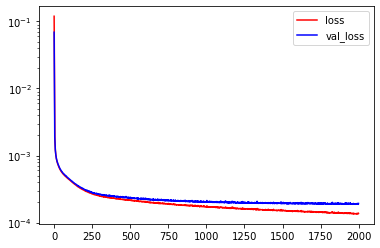

In [8]:
#Plot Training Progree
plt.plot(history.history['loss'], 'r', label='loss')
plt.yscale("log")
plt.plot(history.history['val_loss'], 'b', label='val_loss') if 'val_loss' in history.history else None
plt.legend()
plt.show()

In [9]:
#Save Trained Model
#MLmodel_name = "NN_Model_Valid_" + trainingset["PreProcessMode"] + "_Dagger_InitSet_2Iter"
MLmodel_name = "NN_Model" + "_" + "InitialSet_Noise" #"Aug1Step_1to2StepsbeforeFail_InitialSet"
model.save(ML_Model_Path + MLmodel_name)

Instructions for updating:
If using Keras pass *_constraint arguments to layers.
INFO:tensorflow:Assets written to: /media/jiayu/Seagate/Rubbles_Noise_Add2Steps_1StepbeforeFail_RemovebyClip/ML_Models/NN_Model_InitialSet_Noise/assets


In [10]:
#Save DataSet Setttings
datasetSettings = {"Shift_World_Frame_Type":trainingset["Shift_World_Frame_Type"],
                   "VectorScaleFactor":trainingset["VectorScaleFactor"],
                   "NumPreviewSteps":trainingset["NumPreviewSteps"],
                   "Contact_Representation_Type":trainingset["Contact_Representation_Type"],
                   "TrainingLoss":history.history['loss']}
#Validation loss
datasetSettings["ValidationLoss"] = history.history['val_loss'] if 'val_loss' in history.history else None

#ProProcess
datasetSettings["PreProcessMode"] = trainingset["PreProcessMode"]
datasetSettings["Scaler_X"] = trainingset["Scaler_X"]
datasetSettings["Scaler_Y"] = trainingset["Scaler_Y"]

#Dump File
pickle.dump(datasetSettings, open(ML_Model_Path + MLmodel_name+ '/datasetSettings' +'.p', "wb"))

In [11]:
#Show Prediction Result for Training
from sklearn import preprocessing

datapoint_num = 33
y_pred_temp = model.predict(np.array([x_train[datapoint_num]]))

print(x_train[datapoint_num])

#Recover to original format
if trainingset["PreProcessMode"] == "OriginalForm":
    print("Data Kept Original Form, But need to scale back to meters")
    y_pred_originalform = y_pred_temp/trainingset["VectorScaleFactor"]
    y_true_originalform = y_train[datapoint_num]/trainingset["VectorScaleFactor"]
elif trainingset["PreProcessMode"] == "Standarization" or trainingset["PreProcessMode"] == "MaxAbs":
    y_pred_originalform = dataset["Scaler_Y"].inverse_transform(y_pred_temp)
    y_true_originalform = dataset["Scaler_Y"].inverse_transform(np.array([y_train[datapoint_num]]))
else:
    raise Exception("Unknow Pre Process Mode")


print("predicted result: \n",y_pred_originalform)
print("true value: \n",y_true_originalform)
print("diff: \n", np.absolute(y_pred_originalform - y_true_originalform))

[-1.52858895e-01 -2.05587167e-01  6.39173090e-01  1.77166956e-01
  1.13520033e-01  3.14785003e-02  2.42701544e-08 -9.27010472e-09
  9.18989045e-09 -3.03339699e-01 -1.82052221e-01 -1.47323984e-01
  0.00000000e+00  4.07600237e-01  8.79879765e-01 -1.08538178e-13
 -1.67399763e-01  8.79879765e-01 -1.08538178e-13 -1.67399763e-01
 -1.36174106e-01 -1.08538178e-13  4.07600237e-01 -1.36174106e-01
 -1.08538178e-13 -1.67399763e-01 -1.10558810e-01 -1.42383095e-01
 -7.42399763e-01 -1.10558810e-01 -1.42383095e-01 -7.42399763e-01
 -1.11413510e+00 -2.11739963e-01 -1.67399763e-01 -1.11413510e+00
 -2.11739963e-01  4.07600237e-01 -1.28462115e-01 -4.28672459e-02
 -1.67399763e-01 -1.12032011e-01 -1.34194283e-01 -1.67399763e-01
 -1.09623179e+00 -3.11255813e-01  4.07600237e-01 -1.11266190e+00
 -2.19928775e-01  9.82600237e-01  8.59512762e-01  1.13210360e-01
  4.07600237e-01  8.68392681e-01  6.38511695e-02  4.07600237e-01
 -1.15807103e-01 -1.13210360e-01  9.82600237e-01 -1.24687022e-01
 -6.38511695e-02  9.82600

Data Kept Original Form, But need to scale back to meters
[0.05351732 0.0535302  0.05354256 0.05354821 0.05355357 0.05355589
 0.05356013 0.05357472 0.0535948  0.05360004 0.05361717 0.05368676
 0.05368736 0.05369117 0.05371732 0.05373403 0.05374874 0.05375819
 0.05377545 0.05383478 0.0538788  0.0538927  0.05390861 0.05390863
 0.05393555 0.05393677 0.05393746 0.05394013 0.05394388 0.05394558
 0.05395999 0.05397145 0.0540051  0.0540133  0.05405524 0.05411864
 0.05413219 0.05413961 0.0541497  0.05415076 0.05417453 0.05417463
 0.05418729 0.05426266 0.05429708 0.05432155 0.05433177 0.05433293
 0.05437858 0.05439954 0.05443315 0.05444177 0.05447198 0.05447486
 0.05448871 0.05449304 0.05451922 0.05454712 0.05456091 0.05456801
 0.05456854 0.05460183 0.05461638 0.05465501 0.05466229 0.05466355
 0.05470523 0.05472462 0.05478661 0.05479042 0.05479222 0.05479792
 0.05481059 0.05481525 0.05481978 0.05482371 0.05483991 0.05487109
 0.05487832 0.05490839 0.05492616 0.05493665 0.05493797 0.05493832
 0.0

(array([16., 14.,  7.,  6.,  8.,  9.,  9.,  8., 11., 12.]),
 array([ 0. ,  2.9,  5.8,  8.7, 11.6, 14.5, 17.4, 20.3, 23.2, 26.1, 29. ]),
 <a list of 10 Patch objects>)

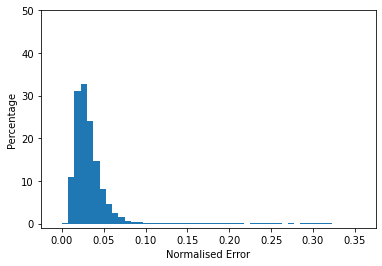

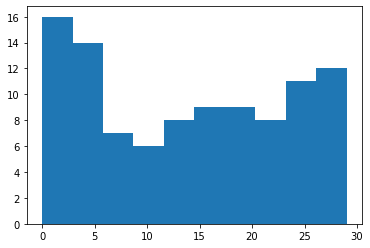

In [12]:
#Error Stat with Training Set
import matplotlib.pyplot as plt
y_pred_train = model.predict(x_train)

if trainingset["PreProcessMode"] == "OriginalForm":
    print("Data Kept Original Form, But need to scale back to meters")
    y_pred_train_originalform = y_pred_train/trainingset["VectorScaleFactor"]
    y_true_train_originalform = y_train/trainingset["VectorScaleFactor"]
elif trainingset["PreProcessMode"] == "Standarization" or trainingset["PreProcessMode"] == "MaxAbs":
    print("PreProcessing of: ", trainingset["PreProcessMode"])
    y_pred_train_originalform = trainingset["Scaler_Y"].inverse_transform(y_pred_train)
    y_true_train_originalform = trainingset["Scaler_Y"].inverse_transform(y_train)
else:
    raise Exception("Unknow Pre Process Mode")

#Compute Error
err = np.linalg.norm(y_true_train_originalform-y_pred_train_originalform, axis=1)

#Plot Histogram
fig=plt.figure();   ax = fig.gca()
plt.hist(err, bins=50, density = True, range = (0.0, 0.375))
ax.set_xlabel("Normalised Error")
ax.set_xlim([-0.025,0.375])
ax.set_ylabel("Percentage")
ax.set_ylim([-1,50])

#### Sort the error

err_sorted = np.sort(err)
print(err_sorted[-1000:])  # print the 100 biggest error

print("Error Mean: ", err_sorted.mean())
print("Error Std", err_sorted.std())

##Plot prediction on the initial dataset
err_initdata=err[0:12000+1]

err_initdata_sorted = np.sort(err_initdata)
print(err_initdata_sorted[-1000:])  # print the 100 biggest error

err_initdata_idx_sorted = np.argsort(err_initdata)
print(err_initdata_idx_sorted[-100:]%30)
selected_err=err_initdata_idx_sorted[-100:]%30
fig=plt.figure();   ax = fig.gca()
plt.hist(selected_err)

Data Kept Original Form, But need to scale back to meters
[0.00545756 0.00571112 0.00583293 ... 0.31509596 0.34066328 0.34161252]
Error Mean:  0.03730459626968121
Error Std 0.02624622377328321


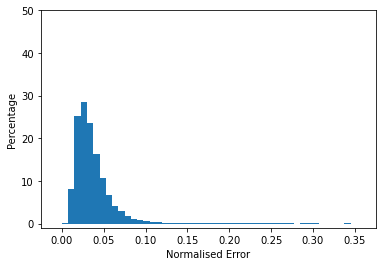

In [13]:
#Error Stat with Validation Set

y_pred_valid = model.predict(x_valid)


if validationset["PreProcessMode"] == "OriginalForm":
    print("Data Kept Original Form, But need to scale back to meters")
    y_pred_valid_originalform = y_pred_valid/validationset["VectorScaleFactor"]
    y_true_valid_originalform = y_valid/validationset["VectorScaleFactor"]
elif validationset["PreProcessMode"] == "Standarization" or validationset["PreProcessMode"] == "MaxAbs":
    print("PreProcessing of: ", validationset["PreProcessMode"])
    y_pred_valid_originalform = validationset["Scaler_Y"].inverse_transform(y_pred_valid)
    y_true_valid_originalform = validationset["Scaler_Y"].inverse_transform(y_valid)
else:
    raise Exception("Unknow Pre Process Mode")

#Compute Error
err = np.linalg.norm(y_true_valid_originalform-y_pred_valid_originalform, axis=1)

#Plot Histogram
fig=plt.figure();   ax = fig.gca()
plt.hist(err, bins=50, density = True, range = (0.0, 0.375))
ax.set_xlabel("Normalised Error")
ax.set_xlim([-0.025,0.375])
ax.set_ylabel("Percentage")
ax.set_ylim([-1,50])

#### Sort the error

err_sorted = np.sort(err)
print(err_sorted)  # print the 100 biggest error

print("Error Mean: ", err_sorted.mean())
print("Error Std", err_sorted.std())



Data Kept Original Form, But need to scale back to meters
[0.00545756 0.00571112 0.00583293 ... 0.31509596 0.34066328 0.34161252]
Error Mean:  0.03730459626968121
Error Std 0.02624622377328321


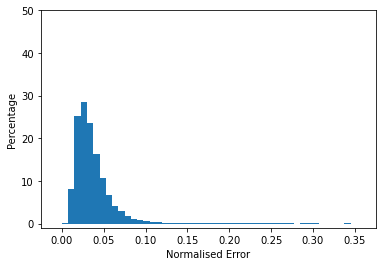

In [14]:
#Error Stat with Test Set

y_pred_test = model.predict(x_test)


if testset["PreProcessMode"] == "OriginalForm":
    print("Data Kept Original Form, But need to scale back to meters")
    y_pred_test_originalform = y_pred_test/testset["VectorScaleFactor"]
    y_true_test_originalform = y_test/testset["VectorScaleFactor"]
elif testset["PreProcessMode"] == "Standarization" or testset["PreProcessMode"] == "MaxAbs":
    print("PreProcessing of: ", validationset["PreProcessMode"])
    y_pred_test_originalform = validationset["Scaler_Y"].inverse_transform(y_pred_test)
    y_true_test_originalform = validationset["Scaler_Y"].inverse_transform(y_test)
else:
    raise Exception("Unknow Pre Process Mode")

#Compute Error
err = np.linalg.norm(y_pred_test_originalform-y_true_test_originalform, axis=1)

#Plot Histogram
fig=plt.figure();   ax = fig.gca()
plt.hist(err, bins=50, density = True, range = (0.0, 0.375))
ax.set_xlabel("Normalised Error")
ax.set_xlim([-0.025,0.375])
ax.set_ylabel("Percentage")
ax.set_ylim([-1,50])

#### Sort the error

err_sorted = np.sort(err)
print(err_sorted)  # print the 100 biggest error

print("Error Mean: ", err_sorted.mean())
print("Error Std", err_sorted.std())